## Import Relevant Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
import kagglehub

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Preprocessing

In [2]:
# Download latest version of synthetic credit card fraud data
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [3]:
df = pd.read_csv(
    "/home/codespace/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv"
)
 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# 'class' is the name of the target var in the synthetic data
y = df["Class"]
X = df.drop("Class", axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 #20% for hold out
)

## EDA

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
missing = df.isnull().sum()
missing

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
features = df.columns.to_list()
features.remove("Class")
print(features)
 
train = X_train.copy()
train["Class"] = y_train
train.head()

print(train["Class"].value_counts())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Class
0    227451
1       394
Name: count, dtype: int64


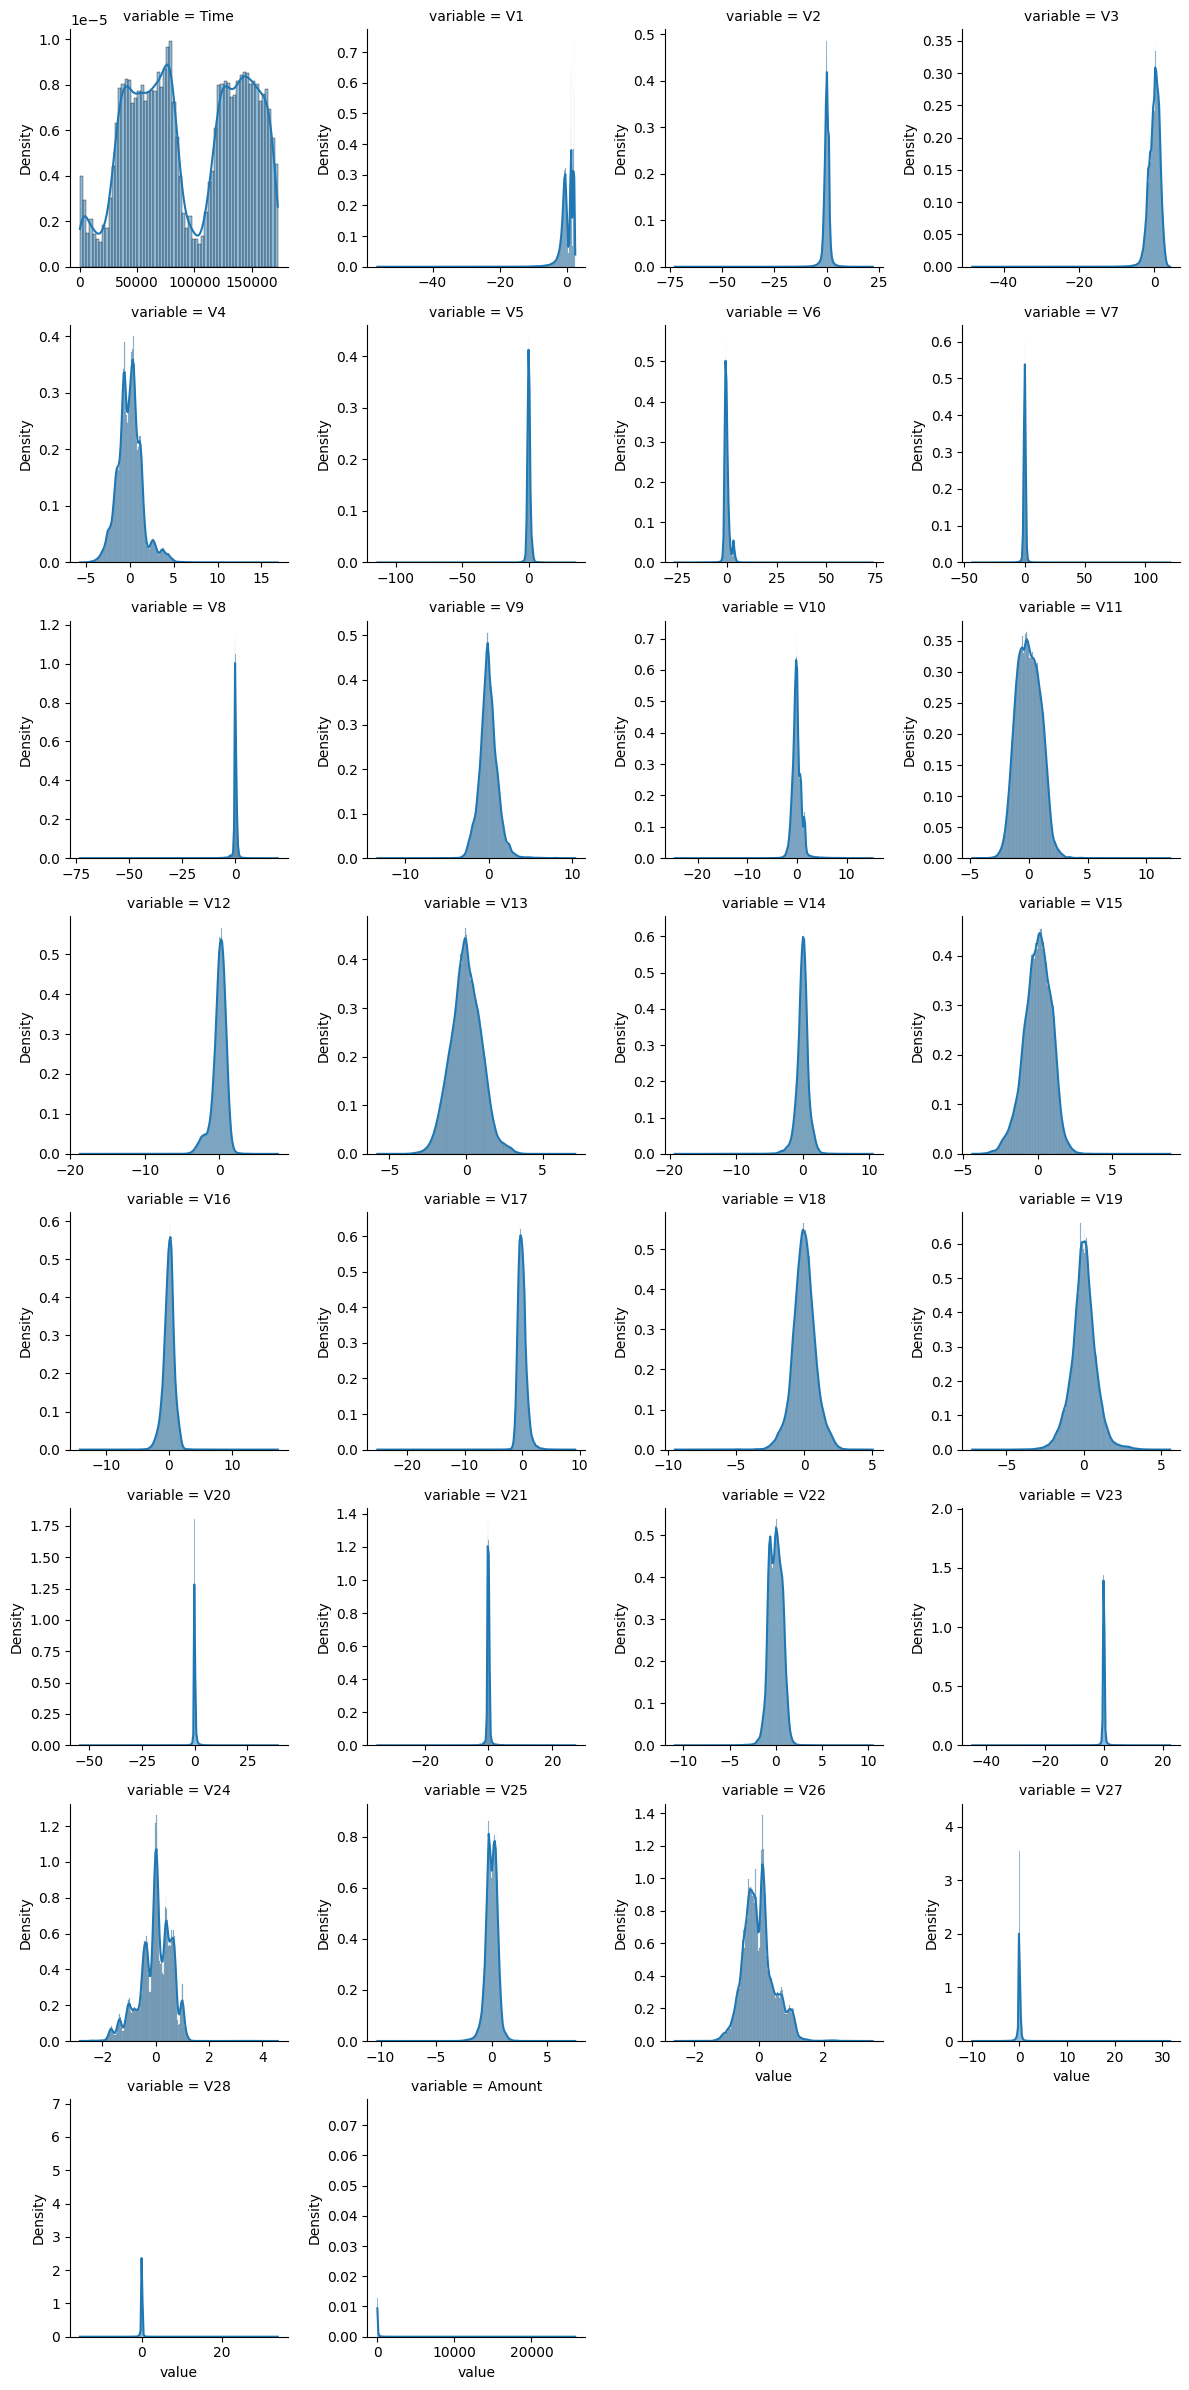

In [9]:
f = pd.melt(train, value_vars=features)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True, stat="density")

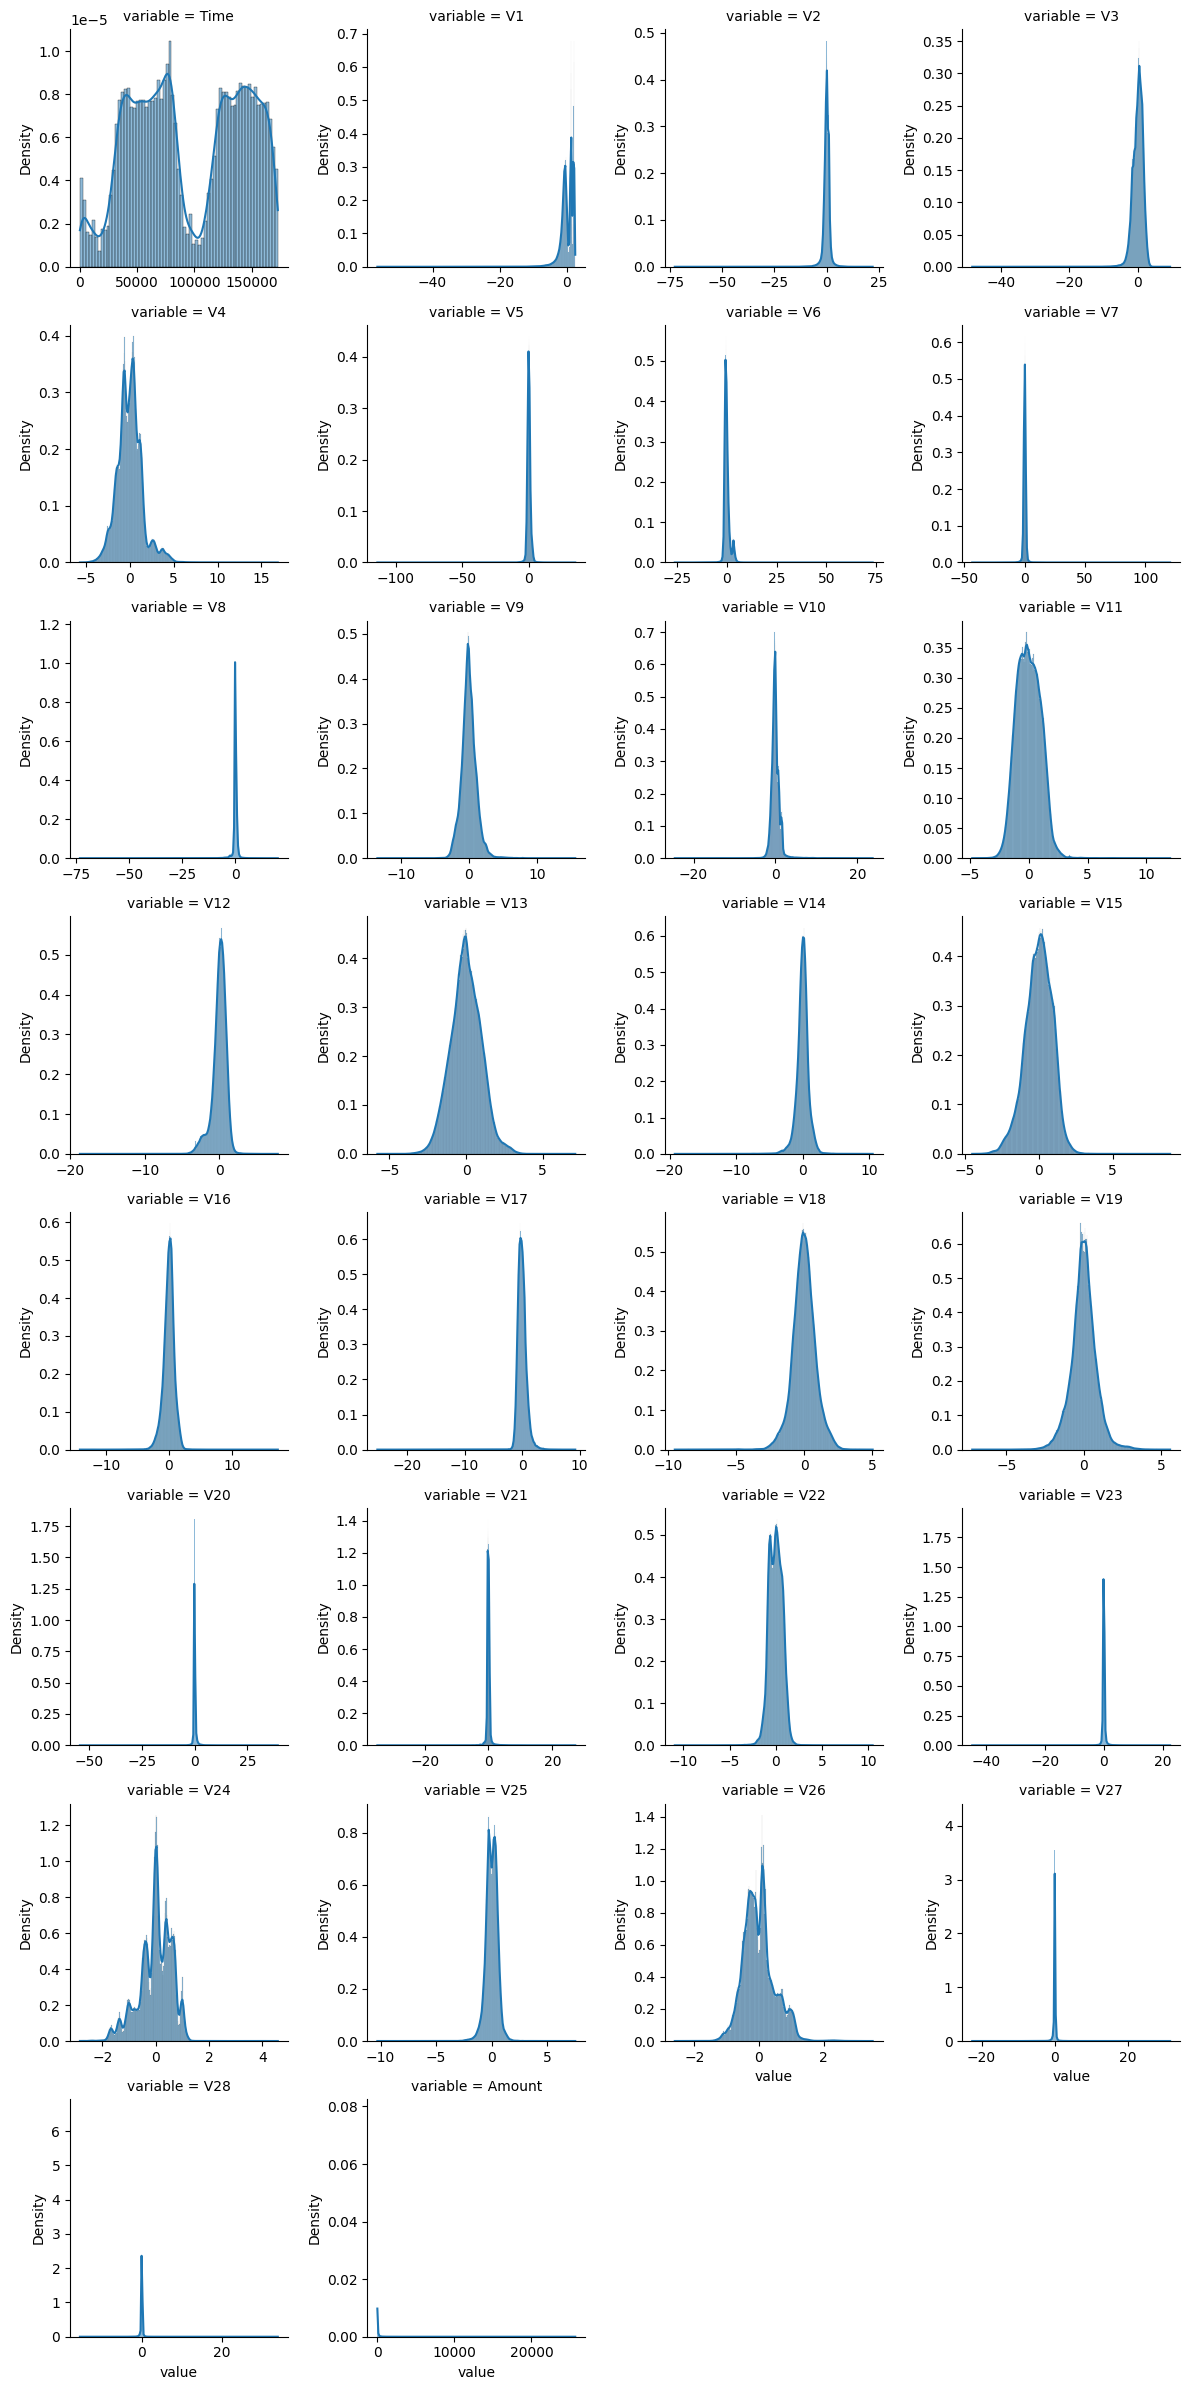

In [10]:
f = pd.melt(X)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True, stat="density")

In [11]:
def point_biserial_corr(frame, features):
    pb_corr = pd.DataFrame()
    pb_corr["features"] = features
 
    pb_corr["point_biserial"] = [
        pointbiserialr(
            pd.to_numeric(frame[f], errors="coerce"), frame["Class"]
        )[0]
        for f in features
    ]
 
    pb_corr = pb_corr.sort_values("point_biserial")
 
    plt.figure(figsize=(6, 0.25 * len(features)))
    sns.barplot(
        data=pb_corr,
        y="features",
        x="point_biserial",
        orient="h",
        palette="rocket",
        hue="features",
        legend=False,
    )
    plt.show()

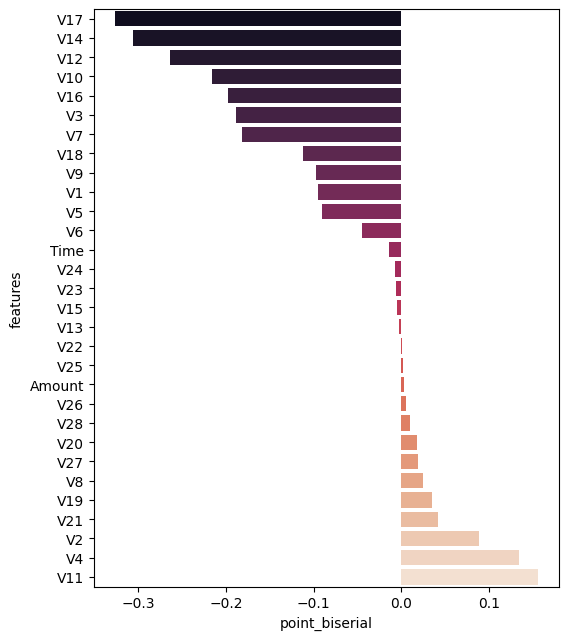

In [12]:
point_biserial_corr(train, features)

<Axes: >

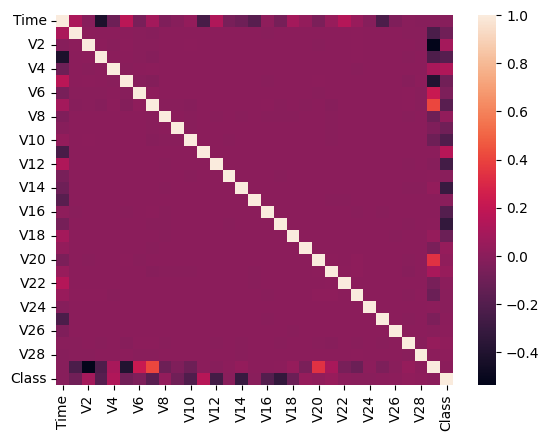

In [13]:
plt.figure(1)
corr = train[features + ["Class"]].corr()
sns.heatmap(corr)